In [101]:
import numpy as np
import matplotlib.pyplot as plt
from dct import analyze1
from dct import analyze2
from thinkdsp import SawtoothSignal
from thinkdsp import decorate
from thinkdsp import read_wave
from scipy.stats import linregress

Упражнение 6.1

In [94]:
signalSaw = SawtoothSignal(200)
waveSaw = signalSaw.make_wave(duration = 4.0, framerate = 65536)

In [95]:
def Speed_Test(ns, func, wave):
    results = []
    for N in ns:
        print(N)
        ts = (0.5 + np.arange(N)) / N
        freqs = (0.5 + np.arange(N)) / 2
        ys = wave.ys[:N]
        result = %timeit -r1 -o func(ys, freqs, ts)
        results.append(result)
        
    res = [result.best for result in results]
    return res

In [96]:
ns = 2 ** np.arange(10, 16)

In [97]:
res1 = Speed_Test(ns, analyze1, waveSaw)

1024
36.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
152 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
1.01 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
8192
5.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16384
35.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
32768
4min 7s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [98]:
res2 = Speed_Test(ns, analyze2, waveSaw)

1024
21.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
2048
46.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
4096
202 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
8192
898 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
16384
3.37 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
32768
13.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


2.559422983032228
1.9194430360643833


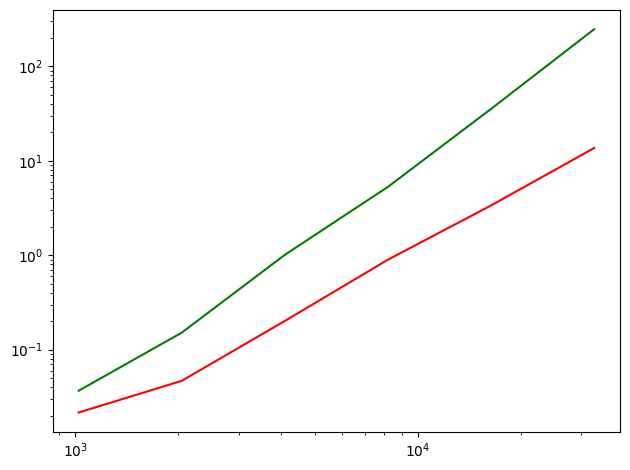

In [99]:
loglog = dict(xscale = 'log', yscale = 'log')
plt.plot(ns, res1, color = "green")
plt.plot(ns, res2, color = "red")
decorate(**loglog)
x = np.log(ns)
print(linregress(np.log(ns), np.log(res1))[0])
print(linregress(np.log(ns), np.log(res2))[0])

Как и было заверено, уклон для analyze2 составил почти 2, однако улон для analyze1 получился равным 2.56. Это можно объяснить набором данных на, на котором проводилось сравнение. На небольших наборах данных оба алгоритма работают сравнительно эффективно, однако с увеличением размера данных analyze2 значительно превосходит analyze1.

Упражнение 6.2

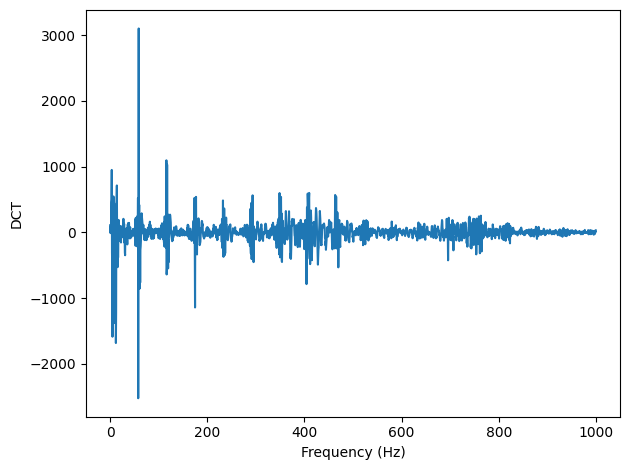

In [122]:
waveVocal = read_wave('87778__marcgascon7__vocals.wav')
segmentVocal = waveVocal.segment(start = 0.8, duration = 0.6)
segmentVocal.normalize()
segmentVocalDct = segmentVocal.make_dct()
segmentVocalDct.plot(high = 1000)
decorate(xlabel = 'Frequency (Hz)', ylabel = 'DCT')
segmentVocal.make_audio()

In [123]:
def compress(dct, thresh = 1):
    dctNew = dct.copy()
    count = 0
    for i, amp in enumerate(dctNew.amps):
        if np.abs(amp) < thresh:
            dctNew.hs[i] = 0
            count += 1
    n = len(dctNew.amps)
    print(count, n, 100 * count / n, sep = '\t')
    return dctNew

21500	26460	81.25472411186696


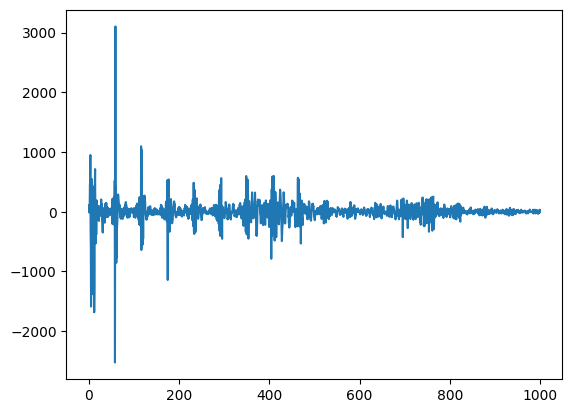

In [132]:
dctNew1 = compress(segmentVocalDct, thresh = 10)
dctNew1.plot(high = 1000)
segmentCompressed1 = dctNew1.make_wave()
segmentCompressed1.make_audio()

Благодаря ДКП удалось сжать звук на 81% и при этом нельзя сказать, что качество звука ухудшилось.

Увеличим амплитуду удаляемых частот, чтобы получить заметное ухудшение качества звука:

25026	26460	94.58049886621315


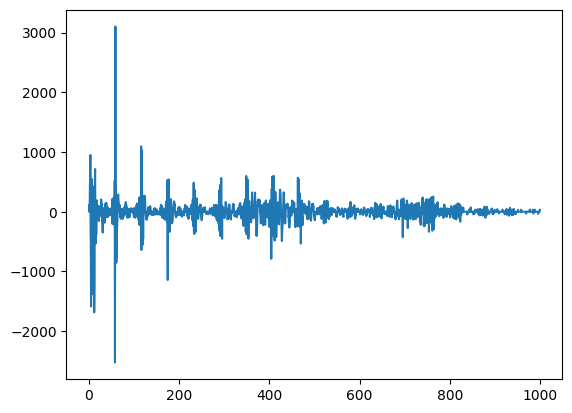

In [133]:
dctNew2 = compress(segmentVocalDct, thresh = 30)
dctNew2.plot(high = 1000)
segmentCompressed2 = dctNew2.make_wave()
segmentCompressed2.make_audio()

Удалив 94.6% частотных компонент, был получен заметно ухудешнный звук.

Упражнение 6.3

Из общих соотношений в фазовой структуре звука и его восприятии точно можно выделить то, что манипуляции с фазовой структорой изменяют и звучание. 

На звуки со слабовыраженной основной частотой эти манипуляции сказываются значительным образом.

На звуки, у которых основная частота имеет приемлемую амплитуду, результаты манипуляции с фазовой структурой можно описать следующим образом: обнуление, создает звон, вращение не оказывает существенного эффекта, а рандомизация добавляет хриплость.